# Amazon Rekognition Service

This is an overview of using the AWS Rekognition Service. As a starting point, we will use an image as a basis to work with. The Rekognition service can work with either images from an S3 bucket or from a stream of bytes. Here is a plot of the image that we are using:

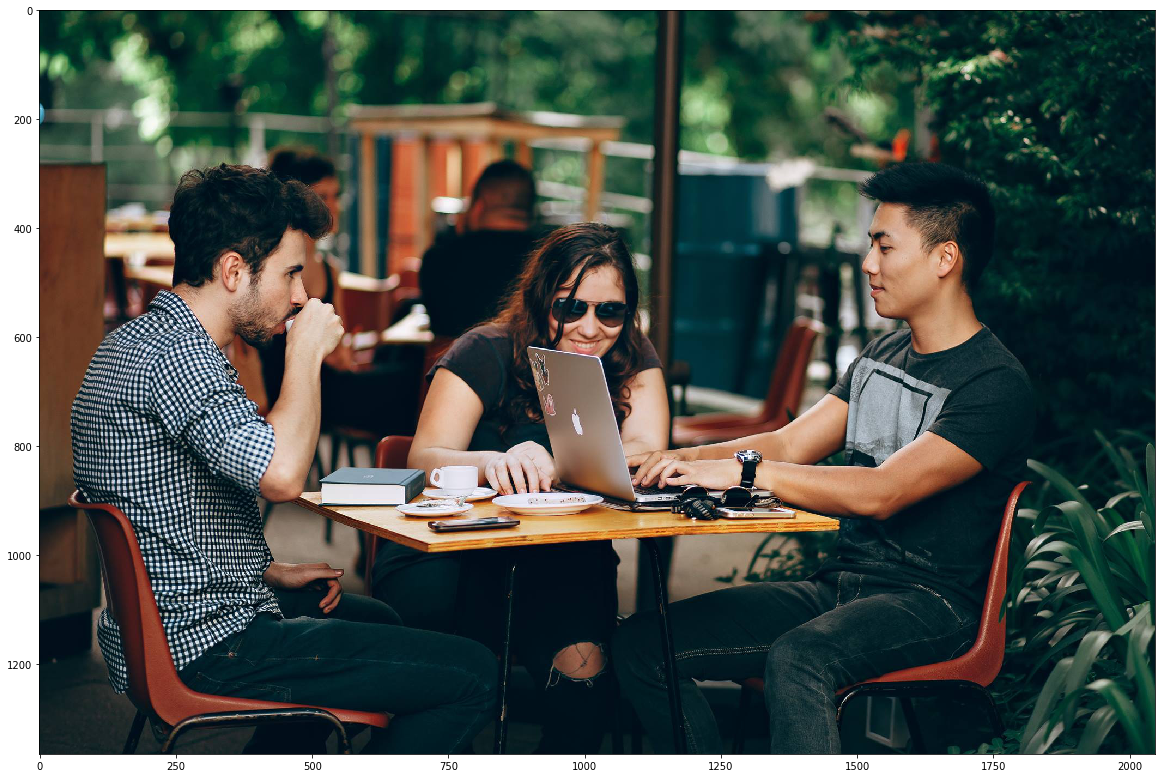

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches

imageFile='data/cafe.jpg'
img=mpimg.imread(imageFile)

plt.figure(figsize=(20, 16))
plt.imshow(img)
plt.show()

# Python AWS SDK - Boto3

[Anaconda Install](https://anaconda.org/anaconda/boto3) - How to install Boto3 using Anaconda.

[Boto3 Quickstart](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/quickstart.html) - This is a good quick start tutorial to get you going with boto3 and verify that it's working properly.

[AWS Rekognition Pricing](https://aws.amazon.com/rekognition/pricing/) - Currently (2/27/2018) the price is $1.00 / 1000 images. Check the link to see updated pricing information.

[Tutorial Basis](https://docs.aws.amazon.com/rekognition/latest/dg/images-bytes.html) - This is the code for the basis of this presentation.

In [2]:
import boto3
client=boto3.client('rekognition')

In [3]:
with open(imageFile, 'rb') as image:
    %time response = client.detect_labels(Image={'Bytes': image.read()})
        
print('Detected labels in ' + imageFile + ':\n')
for label in response['Labels']:
    print (label['Name'] + ' : ' + str(label['Confidence']))

print('\nDone...')


CPU times: user 20.9 ms, sys: 8.56 ms, total: 29.4 ms
Wall time: 799 ms
Detected labels in data/cafe.jpg:

Person : 99.89877319335938
Human : 99.89877319335938
Sitting : 99.89877319335938
Restaurant : 99.72095489501953
Chair : 99.66412353515625
Furniture : 99.66412353515625
Sunglasses : 97.66460418701172
Accessory : 97.66460418701172
Accessories : 97.66460418701172
Dating : 95.6298599243164
Cafeteria : 92.8125228881836
Cafe : 92.75373077392578
Food Court : 86.69856262207031
Food : 86.69856262207031
Pc : 77.42462158203125
Electronics : 77.42462158203125
Laptop : 77.42462158203125
Computer : 77.42462158203125
Eating : 58.370609283447266
Female : 55.515804290771484

Done...


# Object Detection

Now that we have the labels returned by the service, let's plot the bounding box for each label. Some labels apply to the entire image and will not have a bounding box.

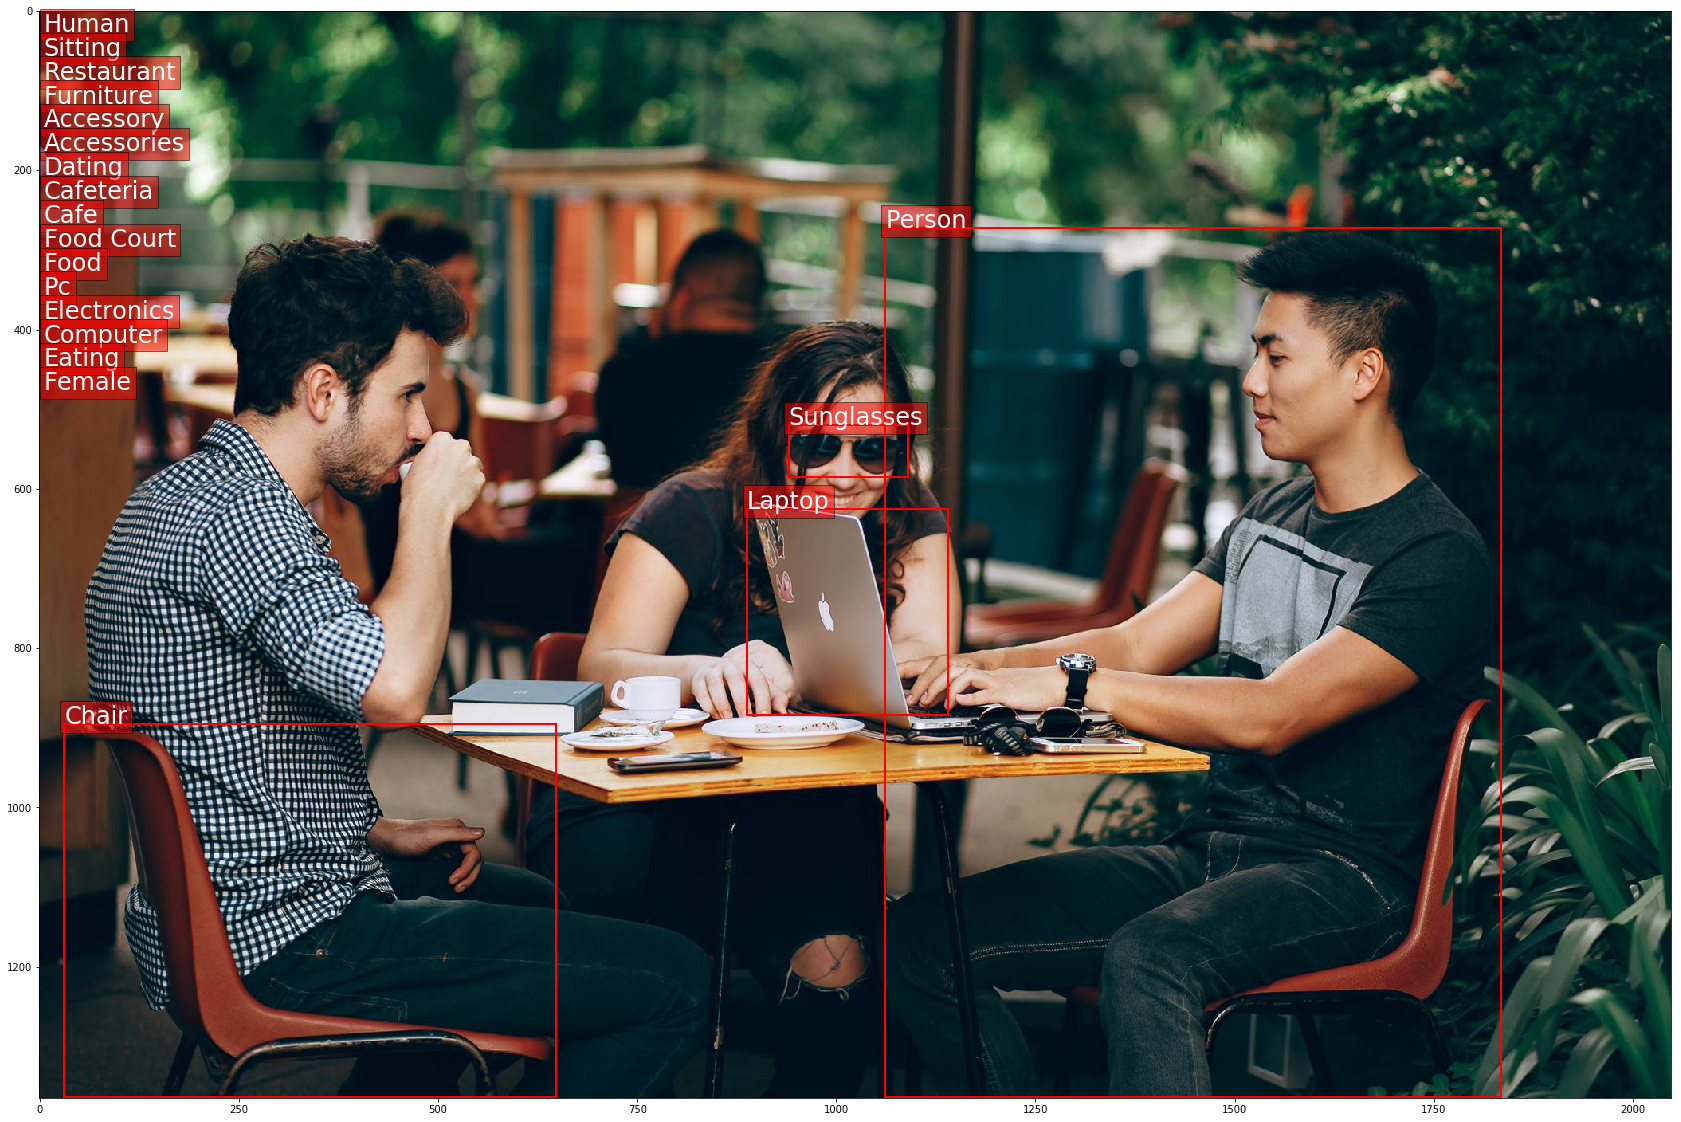

In [4]:
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(30, 20))

# Display the image
ax.imshow(img)
height = img.shape[0]
width = img.shape[1]

top=26
for label in response['Labels']:
    if len(label['Instances']) > 0:
        box = label['Instances'][0]['BoundingBox']
        plt.text(box['Left']*width, box['Top']*height, label['Name'], color='white', 
                 fontsize=24, bbox=dict(facecolor='red', alpha=0.5))
        rect = patches.Rectangle((box['Left']*width, box['Top']*height),
                                 box['Width']*width,box['Height']*height,
                                 linewidth=2,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    else:
        plt.text(5, top, label['Name'], color='white', 
                 fontsize=24, bbox=dict(facecolor='red', alpha=0.5))
        top = top + 30
        
plt.show()

# Fun with Face Detection

Now that we have the label detection working, let's take a look at the face detection method of the service.

CPU times: user 32.8 ms, sys: 124 µs, total: 33 ms
Wall time: 3.19 s


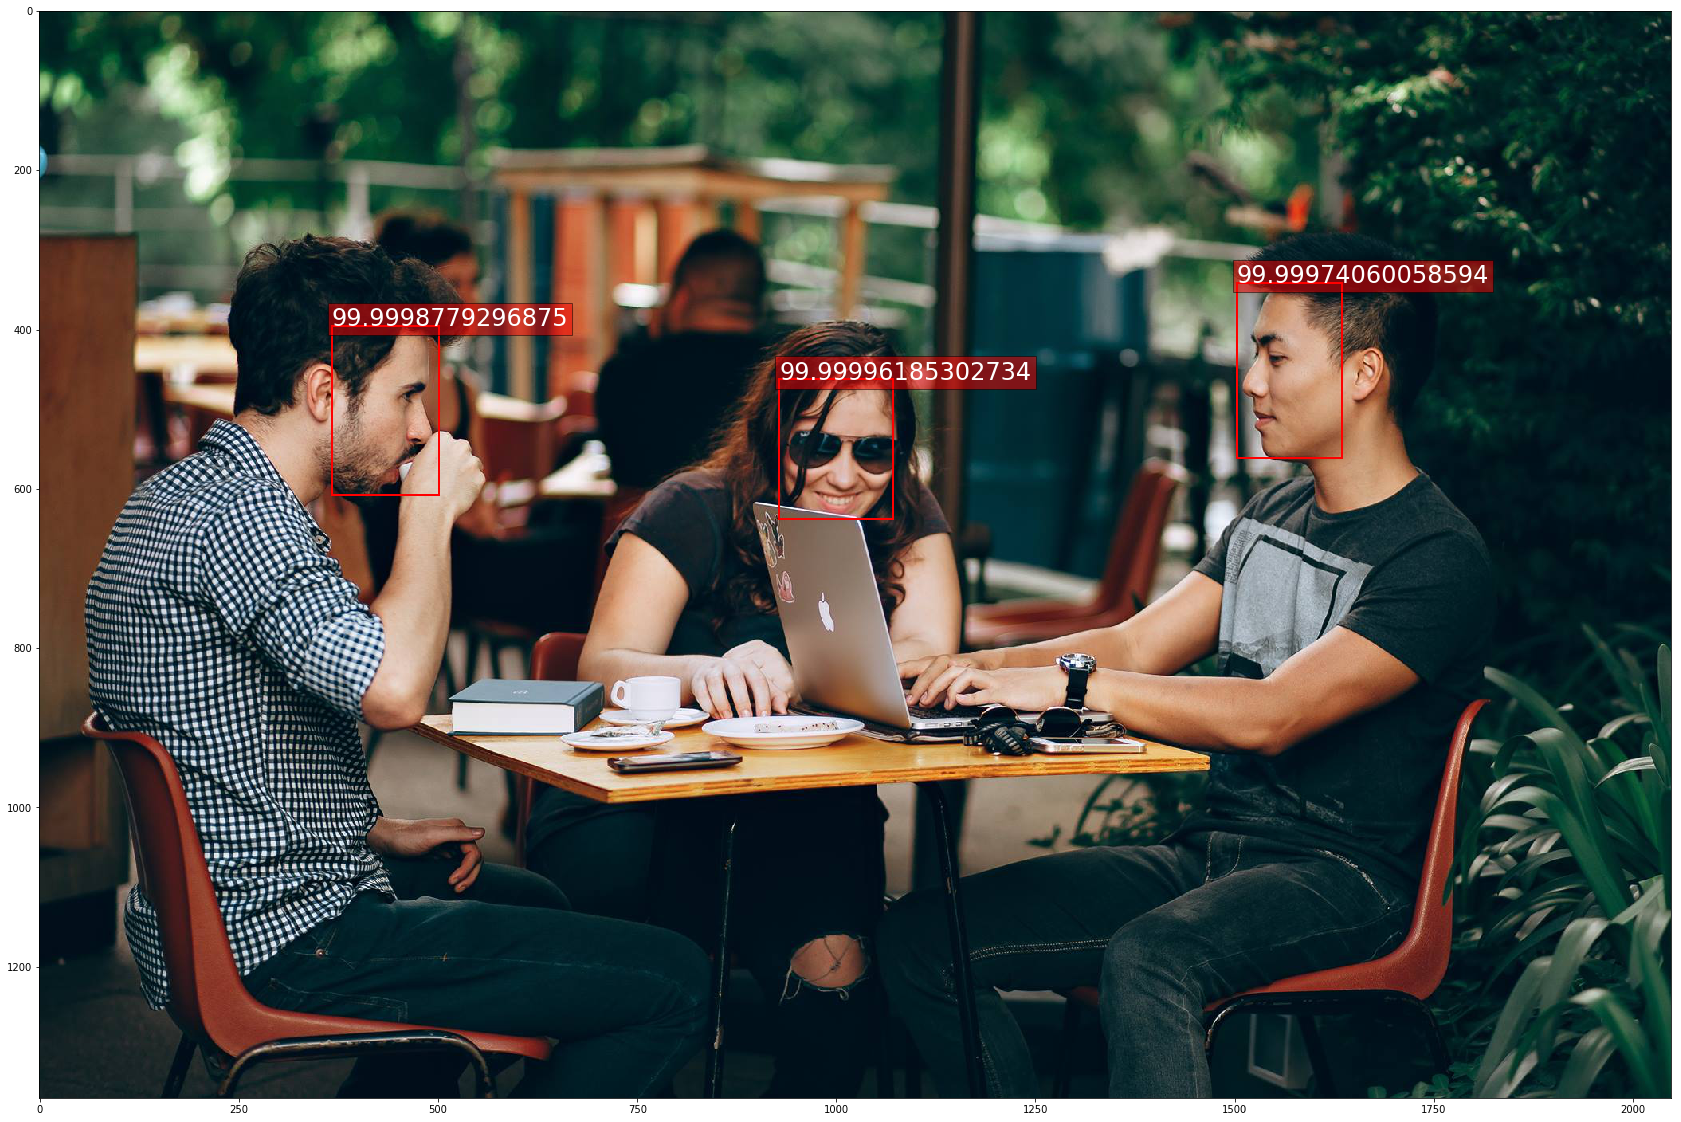

In [8]:
with open(imageFile, 'rb') as image:
    %time response = client.detect_faces(Image={'Bytes': image.read()})
        
# Create figure and axes
fig,ax = plt.subplots(1, figsize=(30, 20))

# Display the image
ax.imshow(img)
height = img.shape[0]
width = img.shape[1]

top=26
for label in response['FaceDetails']:
    box = label['BoundingBox']
    plt.text(box['Left']*width, box['Top']*height, label['Confidence'], color='white', 
         fontsize=24, bbox=dict(facecolor='red', alpha=0.5))

    rect = patches.Rectangle((box['Left']*width, box['Top']*height),
                             box['Width']*width,box['Height']*height,
                             linewidth=2,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
        
plt.show()